In [1]:
import sys
sys.path.insert(0, '/home/pmontesa/code/pygeotools')
from pygeotools.lib import filtlib, iolib, malib, warplib
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import rasterio

In [2]:
from pygeotools import make_stack
import glob

In [3]:
MAINDIR = '/home/pmontesa/pmontesa/outASP/cnn_mode_test'
PNAME_LIST = [
    'WV03_20160616_104001001EBDB400_104001001E13F600',
    'WV02_20160623_10300100577C7E00_1030010058580000',
    'WV01_20130825_1020010024E78600_10200100241E6200'              
             ]

# Make a stacked tif from multiple multi-band tifs (all in same grid, extent, res)

### Fix nodata with rasterio - making it consistent across datasets to be stacked

In [4]:
def fix_no_data_value(input_file, output_file, src_ndv=0, dst_ndv=np.nan, CHANGE_SRC=False):
    '''Re-code non-valid values to a destination nodata value
    Choose to change source raster nodata values
    '''
    with rasterio.open(input_file, "r+") as src:
        if CHANGE_SRC:
            print(f'Changing source nodata in-place from {src.nodata} to {src_ndv}')
            src.nodata = src_ndv
        print(src.nodata)
        with rasterio.open(output_file, 'w',  **src.profile) as dst:
            for i in range(1, src.count + 1):
                dst.nodata = dst_ndv
                band = src.read(i)
                band = np.where(band==src_ndv,dst_ndv,band)
                dst.write(band,i)



### Stack with gdal_merge

In [32]:
#PNAME = 'WV03_20160616_104001001EBDB400_104001001E13F600'
PNAME_LIST = [    'WV02_20160623_10300100577C7E00_1030010058580000',
    'WV01_20130825_1020010024E78600_10200100241E6200'              
             ]

for PNAME in PNAME_LIST:
    fn_list_disp =           glob.glob(f'{MAINDIR}/{PNAME}/*_disparity.tif')
    fn_list_stereop =           glob.glob(f'{MAINDIR}/{PNAME}/*_stacked.tif')
    #fn_list_stereop
    
    input_file = fn_list_stereop[0]
    fixed_stereo_fn = fn_list_stereop[0].replace('.tif', '_fixed.tif')
    fix_no_data_value(input_file, fixed_stereo_fn, src_ndv=0, dst_ndv=np.nan )

    input_file = fn_list_disp[0]
    fixed_disparity_fn = fn_list_disp[0].replace('.tif', '_fixed.tif')
    fix_no_data_value(input_file, fixed_disparity_fn, src_ndv=0, dst_ndv=np.nan)
    
    script_path = 'gdal_merge.py'
    cmd = f"{script_path} -o {MAINDIR}/{PNAME}/stack_all_bands.tif -separate {fixed_stereo_fn} {fixed_disparity_fn}"
    print(cmd)

0.0


Warning 1: Setting nodata to nan on band 1, but band 2 has nodata at 0. The TIFFTAG_GDAL_NODATA only support one value per dataset. This value of nan will be used for all bands on re-opening


None
gdal_merge.py -o /home/pmontesa/pmontesa/outASP/cnn_mode_test/WV02_20160623_10300100577C7E00_1030010058580000/stack_all_bands.tif -separate /home/pmontesa/pmontesa/outASP/cnn_mode_test/WV02_20160623_10300100577C7E00_1030010058580000/1030010058580000.r100_0.514m_stacked_fixed.tif /home/pmontesa/pmontesa/outASP/cnn_mode_test/WV02_20160623_10300100577C7E00_1030010058580000/1030010058580000.r100_0.514m_disparity_fixed.tif
0.0


Warning 1: Setting nodata to nan on band 1, but band 2 has nodata at 0. The TIFFTAG_GDAL_NODATA only support one value per dataset. This value of nan will be used for all bands on re-opening


0.0


Warning 1: Setting nodata to nan on band 1, but band 2 has nodata at 0. The TIFFTAG_GDAL_NODATA only support one value per dataset. This value of nan will be used for all bands on re-opening


gdal_merge.py -o /home/pmontesa/pmontesa/outASP/cnn_mode_test/WV01_20130825_1020010024E78600_10200100241E6200/stack_all_bands.tif -separate /home/pmontesa/pmontesa/outASP/cnn_mode_test/WV01_20130825_1020010024E78600_10200100241E6200/1020010024E78600.r100_0.553m_stacked_fixed.tif /home/pmontesa/pmontesa/outASP/cnn_mode_test/WV01_20130825_1020010024E78600_10200100241E6200/1020010024E78600.r100_0.553m_disparity_fixed.tif


In [33]:
# input_file = fn_list_stereop[0]
# output_file = fn_list_stereop[0].replace('.tif', '_fixed.tif')
# fix_no_data_value(input_file, output_file, src_ndv=0, dst_ndv=np.nan )

In [34]:
# input_file = fn_list_disp[0]
# output_file = fn_list_disp[0].replace('.tif', '_fixed.tif')
# fix_no_data_value(input_file, output_file, src_ndv=0, dst_ndv=np.nan)

In [37]:
# with rasterio.open(fn_list_stereop[0].replace('.tif', '_fixed.tif')) as ds:
#     print(ds.meta)

# with rasterio.open(fn_list_disp[0].replace('.tif', '_fixed.tif')) as ds:
#     print(ds.meta)

In [36]:
# script_path = '/panfs/ccds02/app/modules/anaconda/platform/x86_64/rhel/8.6/3-2022.05/envs/gdalNgmt/bin/gdal_merge.py'
# script_path = 'gdal_merge.py'
# cmd = f'{script_path} -o stack_all_bands.tif -separate *_stacked_fixed.tif *_disparity_fixed.tif'
# !echo $cmd
# !eval $cmd

In [35]:
# warp_ds_list = warplib.diskwarp_multi_fn(fn_list, res=fn_list_asp_reference[0], extent=fn_list_asp_reference[0], t_srs=fn_list_asp_reference[0], r='near', dst_ndv=-10001, outdir=f'{INDIR}/{PNAME}')


## Check the bands of the stack

['Stereopair 1', 'Stereopair 2', 'Horizontal disparities', 'Vertical disparities']


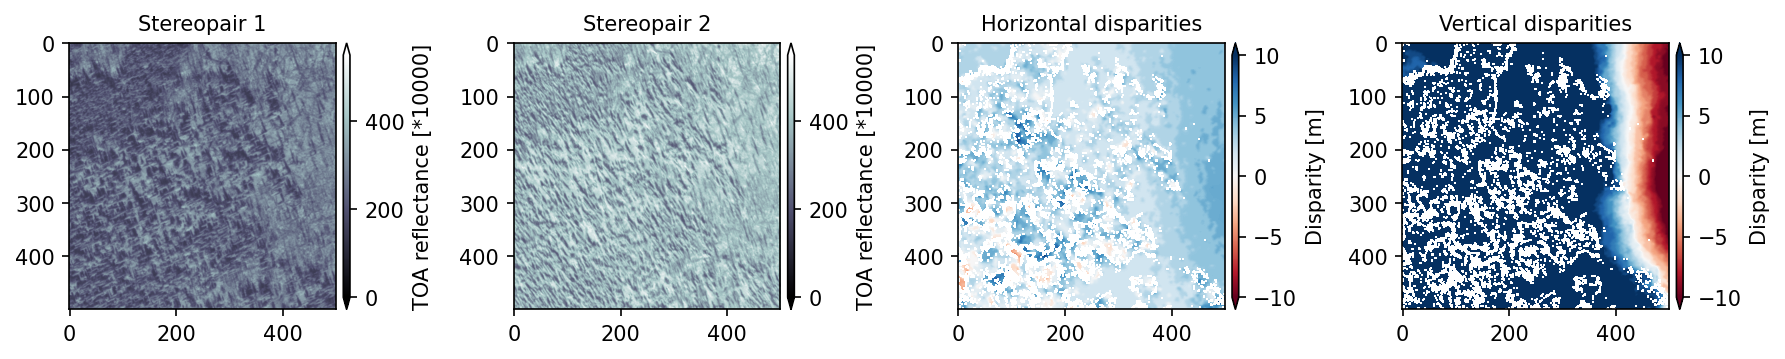

In [9]:
MAINDIR = '/home/pmontesa/pmontesa/outASP/cnn_mode_test'
REFDIR = f'{MAINDIR}/WV03_20160616_104001001EBDB400_104001001E13F600'
fn_list = glob.glob(f'{REFDIR}/stack_all_bands.tif')
stack_ma_list = [iolib.fn_getma(fn, bnum=bnum) for fn in fn_list for bnum in [1,2,3,4]]
CHECK_STACK_BANDS(stack_ma_list, fn_list, start=7500, sz=500)

A textured forested extent

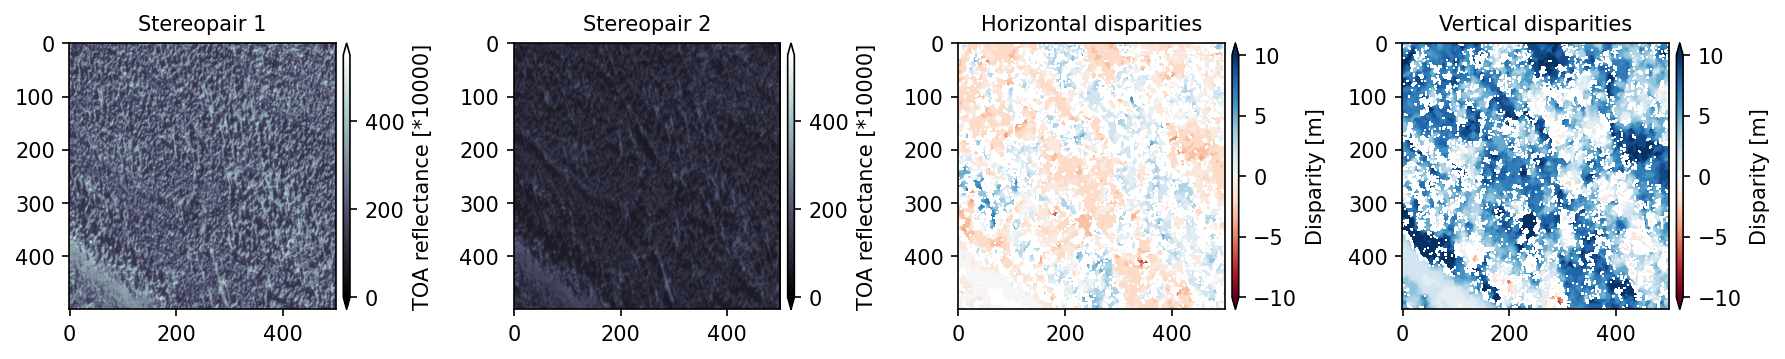

In [186]:
MAINDIR = '/home/pmontesa/pmontesa/outASP/cnn_mode_test'
REFDIR = f'{MAINDIR}/WV01_20130825_1020010024E78600_10200100241E6200'
fn_list = glob.glob(f'{REFDIR}/stack_all_bands.tif')
stack_ma_list = [iolib.fn_getma(fn, bnum=bnum) for fn in fn_list for bnum in [1,2,3,4]]
CHECK_STACK_BANDS(stack_ma_list, fn_list, start=10000, sz=500)

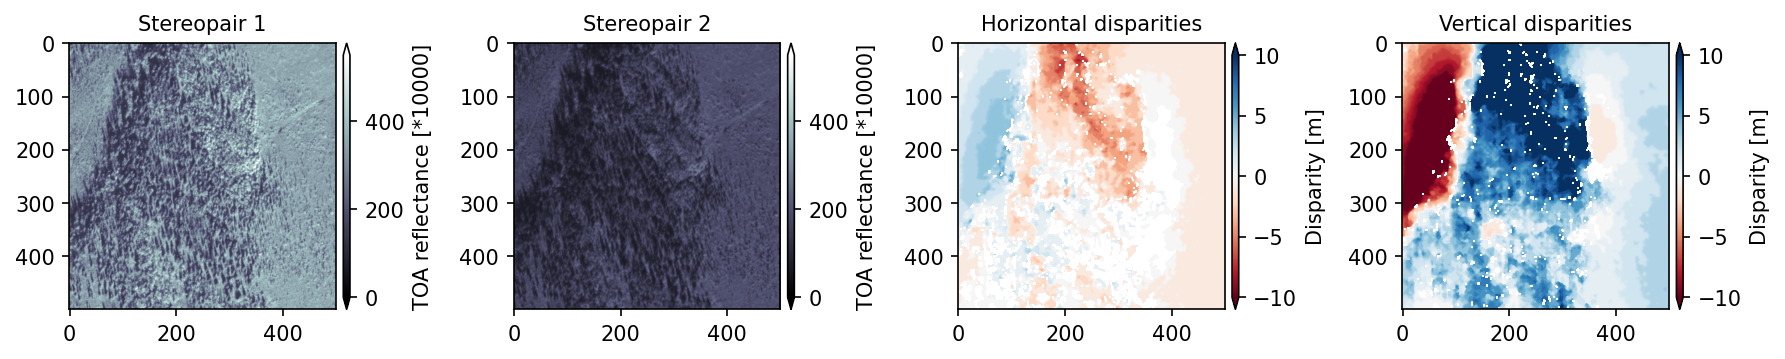

In [187]:
CHECK_STACK_BANDS(stack_ma_list, fn_list, start=15000, sz=500)

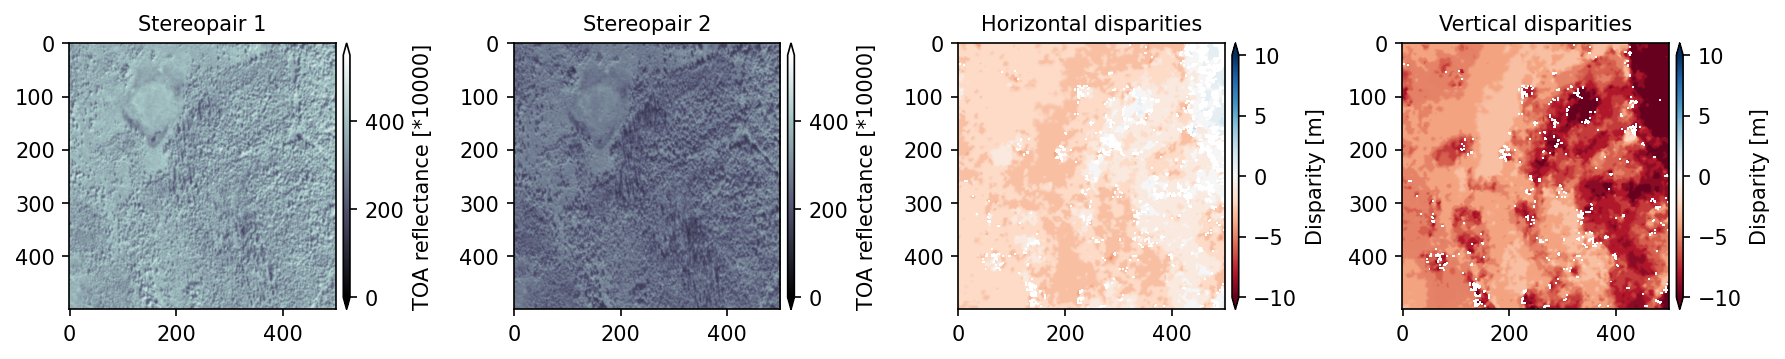

In [188]:
REFDIR = f'{MAINDIR}/WV02_20160623_10300100577C7E00_1030010058580000'
fn_list = glob.glob(f'{REFDIR}/stack_all_bands.tif')
stack_ma_list = [iolib.fn_getma(fn, bnum=bnum) for fn in fn_list for bnum in [1,2,3,4]]
CHECK_STACK_BANDS(stack_ma_list, fn_list, start=10000, sz=500)

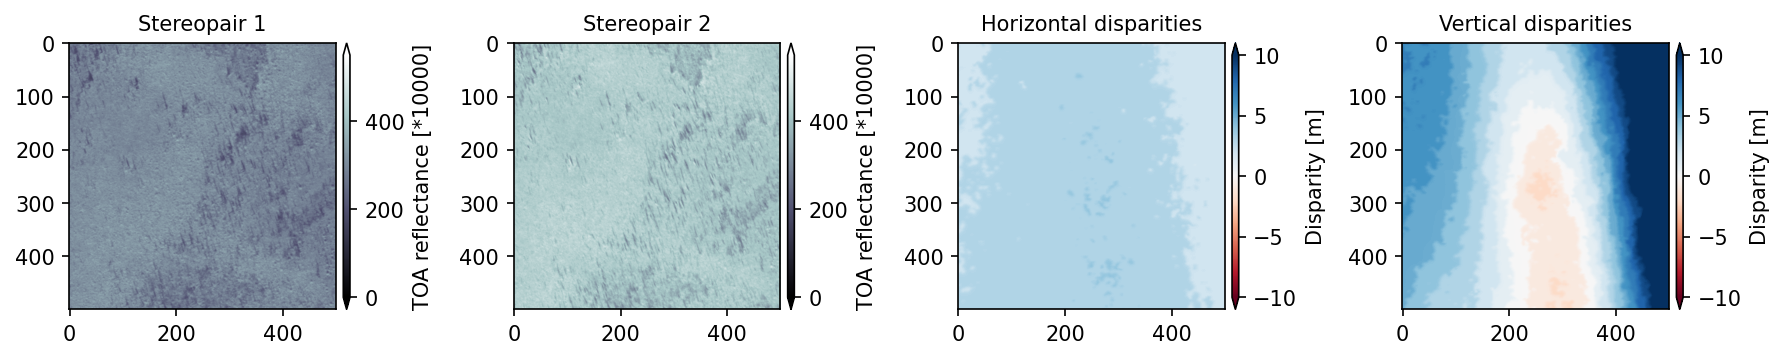

In [173]:
REFDIR = f'{MAINDIR}/WV03_20160616_104001001EBDB400_104001001E13F600'
fn_list = glob.glob(f'{REFDIR}/stack_all_bands.tif')
stack_ma_list = [iolib.fn_getma(fn, bnum=bnum) for fn in fn_list for bnum in [1,2,3,4]]
CHECK_STACK_BANDS(stack_ma_list, fn_list, start=10000, sz=500)

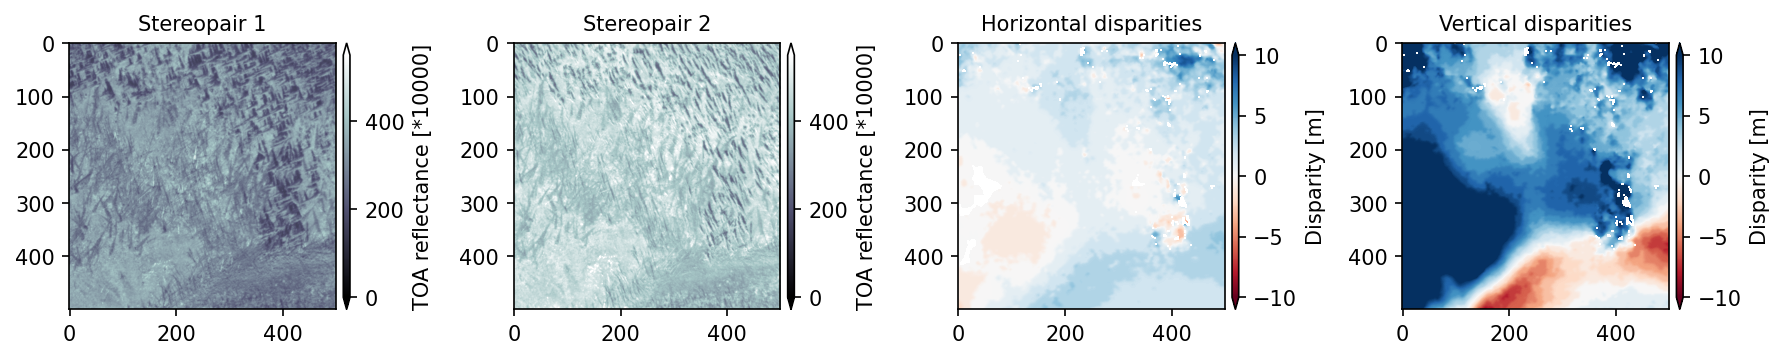

In [179]:
CHECK_STACK_BANDS(stack_ma_list, fn_list, start=12000, sz=500)

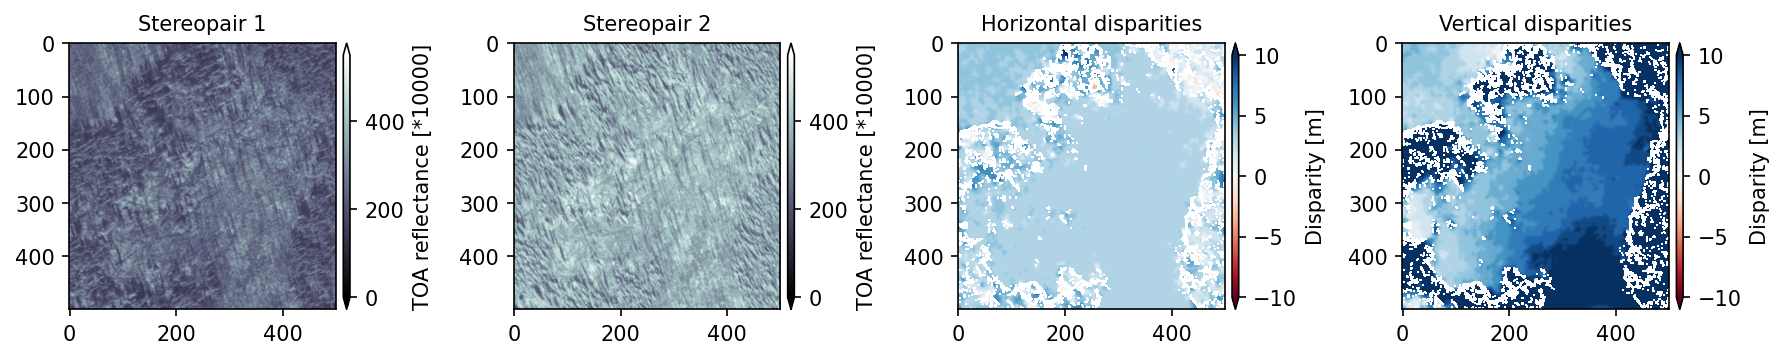

In [178]:
CHECK_STACK_BANDS(stack_ma_list, fn_list, start=7000, sz=500)

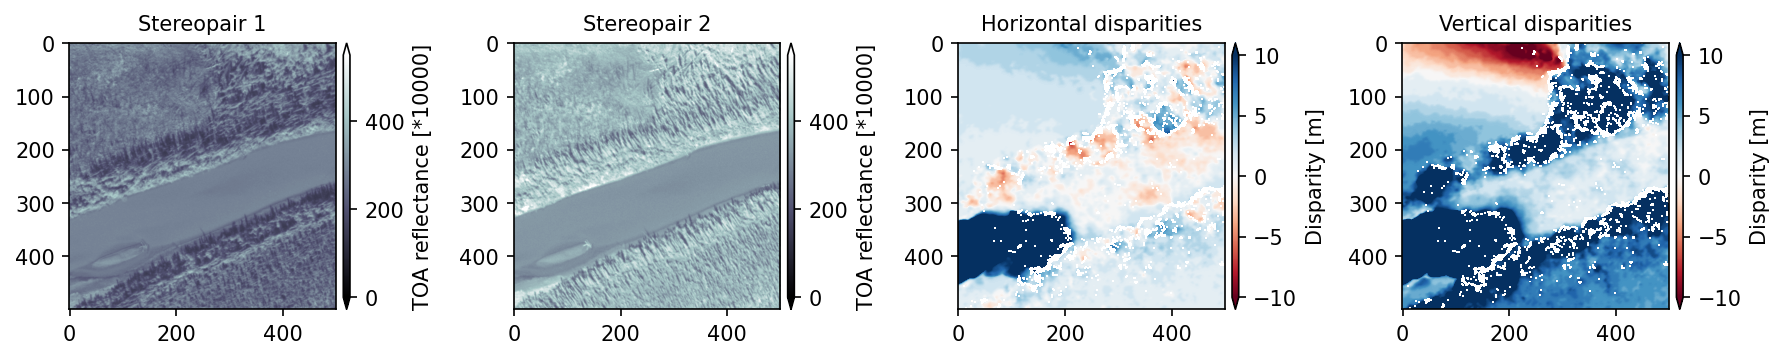

In [185]:
# River with forested banks
CHECK_STACK_BANDS(stack_ma_list, fn_list, start=12400, sz=500)

In [6]:
def CHECK_STACK_BANDS(warp_ma_list, fn_list, start, sz):
    fig, axa = plt.subplots(nrows=1, ncols=4, dpi=150, figsize=(12,4)) 

    # Set all layer names
    layer_names = ['Stereopair 1', 'Stereopair 2', 'Horizontal disparities', 'Vertical disparities']
    CLIMS = [(0,550), (0,550), (-10,10),  (-10,10)]
    # Set all cmaps
    cmap_list = ['bone', 'bone', 'RdBu', 'RdBu']
    # Set all labels
    label_list = [f'TOA reflectance [*{int(1e4)}]',f'TOA reflectance [*{int(1e4)}]', 'Disparity [m]', 'Disparity [m]']

    # Maybe makes plotting easier
    #start=5000
    #sz=1000
    sub_ma_list = [ ma[start:start+sz, start:start+sz] for ma in warp_ma_list]
    #dz = sub_ma_list[2] - sub_ma_list[3]
    # -------
    # Maps
    # -------
    print(layer_names)
    for n, ax in enumerate(axa.ravel()):
        # This makes leftover axes empty and doesnt return an error
        if n >= len(sub_ma_list):
            ax.axis('off')
            pass
        else:
            ma = sub_ma_list[n]
            im = ax.imshow(ma, cmap=cmap_list[n], clim=CLIMS[n])#,  clim=(np.nanpercentile(ma, 5), np.nanpercentile(ma,95)))
            ax.set_title(layer_names[n], fontsize=10)
            divider = make_axes_locatable(ax)
            cax = divider.append_axes('right', size='2.5%', pad=0.05)
            cb = fig.colorbar(im, cax=cax, orientation='vertical', extend='both')
            cb.set_label(label_list[n])
    #ax.imshow(dz, cmap=cmap_list[3], clim=CLIMS[3])
    plt.tight_layout()